# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import passengers.csv and set it as a time-series object. Plot the TS
df=pd.read_csv('passengers.csv')
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
df.Month = pd.to_datetime(df.Month)
df.set_index('Month',inplace=True)

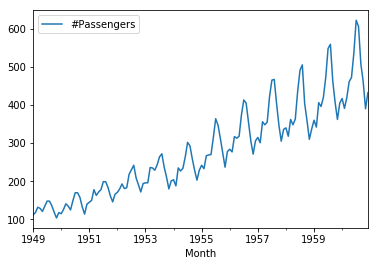

In [13]:
df.plot();

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [32]:
from statsmodels.tsa.stattools import adfuller

# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
def stationary_check(ts):
    rolmean=ts.rolling(window=12,center=False).mean()
    rolstd=ts.rolling(window=12,center=False).std()
    fig=plt.figure()
    original=plt.plot(ts,label='Original')
    mean=plt.plot(rolmean,label='Rolling Mean')
    std=plt.plot(rolstd,label='Rolling Standard Deviation')
    plt.legend()
    plt.title('Passengers')
    plt.show();
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test')
    dftest=adfuller(ts['#Passengers'])
    
    # Extract and display test results in a user friendly manner
    # Collect and package the code from previous lab
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None


Use your newly created function on the airpassenger data set.

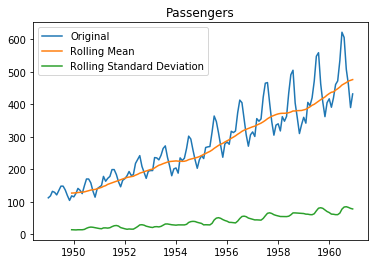

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
stationary_check(df)

## Perform a log() and sqrt() transform

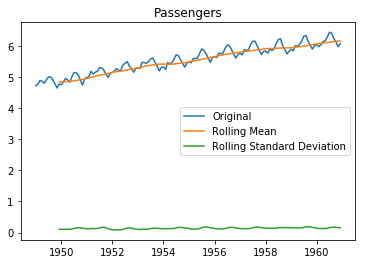

Results of Dickey-Fuller Test
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [34]:
# Log transform timeseries and compare with original to check the effect
log_df=np.log(df)
stationary_check(log_df)

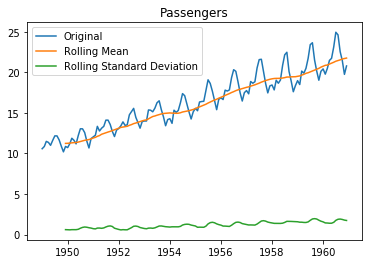

Results of Dickey-Fuller Test
Test Statistic                  -0.345854
p-value                          0.918754
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [35]:
sqrt_df=np.sqrt(df)
stationary_check(sqrt_df)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

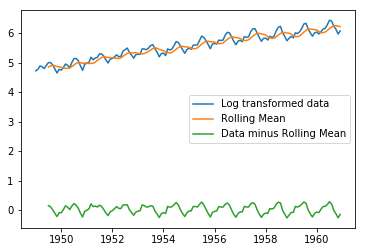

In [36]:
# your code here
rolmean=log_df.rolling(window=7).mean()

log_df_minus_rolmean=log_df-rolmean
fig=plt.figure()
plt.plot(log_df,label="Log transformed data")
plt.plot(rolmean,label="Rolling Mean")
plt.plot(log_df_minus_rolmean,label='Data minus Rolling Mean')
plt.legend()
plt.show()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [38]:
# Subtract the moving average from the original data and check head for Nans
log_df_minus_rolmean.isna().sum()

#Passengers    6
dtype: int64

In [41]:
# Drop the NaN values from timeseries calculated above
log_df_minus_rolmean.dropna(inplace=True)

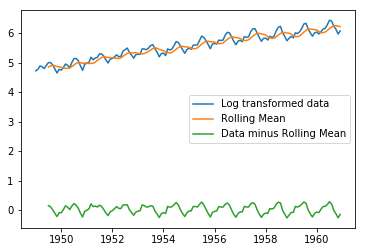

In [44]:
# Plot the result
fig=plt.figure()
plt.plot(log_df,label="Log transformed data")
plt.plot(rolmean,label="Rolling Mean")
plt.plot(log_df_minus_rolmean,label='Data minus Rolling Mean')
plt.legend()
plt.show()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

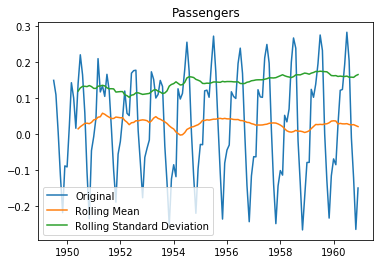

Results of Dickey-Fuller Test
Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [45]:
stationary_check(log_df_minus_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [47]:
#It's definitely more stationary than it was before.  The p-value is still too high, though.
#Looks like there might be some seasonality as well.

## Subtracting the weighted rolling mean

Repeat all the above for the *weighted* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

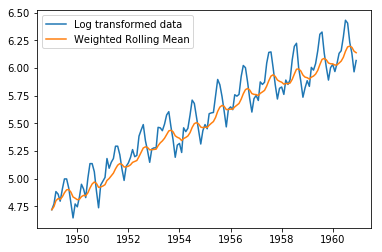

In [49]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log

log_df_weighted_rolmean = log_df.ewm(halflife = 4).mean()

# Plot the original data with exp weighted average
fig=plt.figure()
plt.plot(log_df,label="Log transformed data")
plt.plot(log_df_weighted_rolmean,label="Weighted Rolling Mean")
plt.legend()
plt.show()

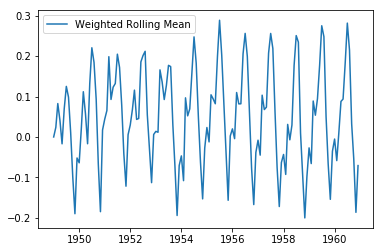

In [51]:
# Subtract the moving average from the original data and plot
log_df_minus_weighted_mean=log_df-log_df_weighted_rolmean
fig=plt.figure()
plt.plot(log_df_minus_weighted_mean,label="Weighted Rolling Mean")
plt.legend()
plt.show()

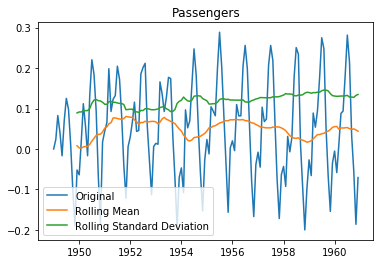

Results of Dickey-Fuller Test
Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [52]:
# do a stationarity check
stationary_check(log_df_minus_weighted_mean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [53]:
# The p-value is smaller than 0.05 so it looks like it's stationary enough to be predictable.

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [62]:
# difference your data and look at the head
processed_df=log_df_minus_weighted_mean
data_diff = processed_df.diff(periods=15)
data_diff.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


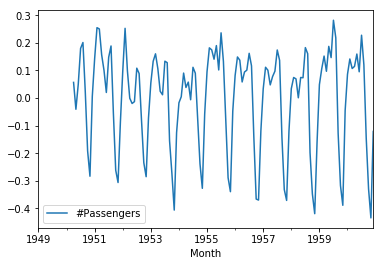

In [63]:
# plot your differenced time series
data_diff.plot();

In [65]:
# drop nas
data_diff.dropna(inplace=True)

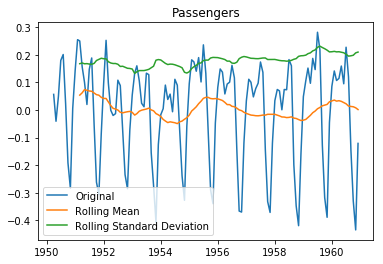

Results of Dickey-Fuller Test
Test Statistic                  -3.566827
p-value                          0.006428
#Lags Used                      13.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


In [66]:
# perform the stationarity check
stationary_check(data_diff)

### Your conclusion

In [67]:
# The p-value dropped even lower so this is much more stationary.  There's still some seasonality present so there's
# probably a better number of periods to use for the differencing.

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.